In [13]:
from IPython.display import display
import json
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
#from sklearn_pandas import DataFrameMapper

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [4]:
female = pd.read_csv('/Users/nmokhber/Documents/USC/adverserial_ml/project/data/Adult/female_adult_dataset')

In [5]:
female.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
2,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
3,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
4,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
female.shape

(14695, 15)

In [6]:
male = pd.read_csv('/Users/nmokhber/Documents/USC/adverserial_ml/project/data/Adult/male_adult_dataset')

In [7]:
male.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [10]:
male.shape

(30527, 15)

In [11]:
female.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,14695.000000,1.469500e+04,14695.000000,14695.000000,14695.000000,14695.000000
mean,36.984757,1.855873e+05,10.105886,588.132290,61.480095,36.932902
std,13.700223,1.033216e+05,2.371012,5117.756955,338.780980,11.554959
min,17.000000,1.939500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.163625e+05,9.000000,0.000000,0.000000,32.000000
50%,35.000000,1.756620e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.291180e+05,12.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
male.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30527.000000,3.052700e+04,30527.000000,30527.000000,30527.000000,30527.000000
mean,39.300423,1.917312e+05,10.124513,1348.520294,101.648115,42.865987
std,12.912214,1.066811e+05,2.635975,8406.895418,432.621702,11.742173
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,29.000000,1.178585e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.802200e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.418375e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [27]:

column = ' workclass'
y_female = female[column].value_counts()
y_female = y_female.sort_index(ascending=True)
print(type(y_female))
print(y_female)
print(y_female.shape)
 

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Y'],
      dtype='object')
<class 'pandas.core.series.Series'>
 Federal-gov           445
 Local-gov            1244
 Private             11428
 Self-emp-inc          199
 Self-emp-not-inc      617
 State-gov             755
 Without-pay             7
Name:  workclass, dtype: int64
(7,)


In [28]:

y_male = male[column].value_counts()
y_male = y_male.sort_index(ascending=True)
print(type(y_male))
print(y_male)
print(y_male.shape)
 

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Y'],
      dtype='object')
<class 'pandas.core.series.Series'>
 Federal-gov           961
 Local-gov            1856
 Private             21879
 Self-emp-inc         1447
 Self-emp-not-inc     3179
 State-gov            1191
 Without-pay            14
Name:  workclass, dtype: int64
(7,)


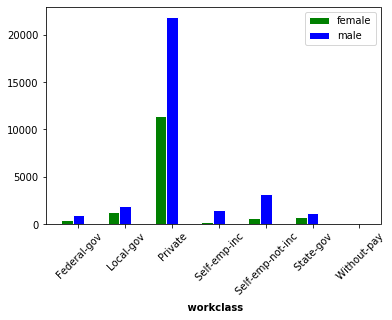

In [32]:
# work class


# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = y_female
bars2 = y_male

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='female')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='male')
 
# Add xticks on the middle of the group bars
plt.xlabel(column, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],y_female.index.values.tolist())
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()


In [48]:
def draw_bar_plot(column):
    y_female = female[column].value_counts()
    #y_female = y_female.sort_index(ascending=True)
    print(type(y_female))
    print(y_female)
    print(y_female.shape)
    
    y_male = male[column].value_counts()
    y_male = y_male.sort_index(ascending=True)
    print(type(y_male))
    print(y_male)
    print(y_male.shape)
    
    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars1 = y_female
    bars2 = y_male


    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='female')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='male')

    # Add xticks on the middle of the group bars
    plt.xlabel(column, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))],y_female.index.values.tolist())
    plt.xticks(rotation=45)
    # Create legend & Show graphic
    plt.legend()
    plt.show()



<class 'pandas.core.series.Series'>
 10th             391
 11th             556
 12th             179
 1st-4th           56
 5th-6th          109
 7th-8th          197
 9th              187
 Assoc-acdm       585
 Assoc-voc        675
 Bachelors       2330
 Doctorate        108
 HS-grad         4661
 Masters          803
 Preschool         20
 Prof-school      124
 Some-college    3714
Name:  education, dtype: int64
(16,)
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Y'],
      dtype='object')
<class 'pandas.core.series.Series'>
 10th              832
 11th             1063
 12th              398
 1st-4th           166
 5th-6th           340
 7th-8th           626
 9th               489
 Assoc-acdm        922
 Assoc-voc        1284
 Bachelors        5240
 Doctorate         436
 HS-grad         10122
 M

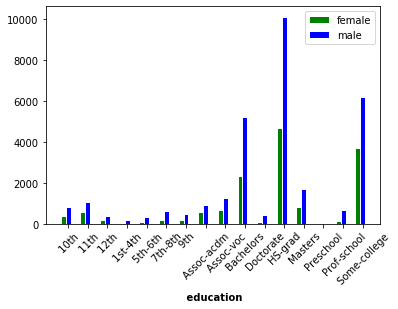

In [36]:
draw_bar_plot(' education')

<class 'pandas.core.series.Series'>
 Divorced                 3785
 Married-AF-spouse          21
 Married-civ-spouse       2213
 Married-spouse-absent     274
 Never-married            6513
 Separated                 852
 Widowed                  1037
Name:  marital-status, dtype: int64
(7,)
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Y'],
      dtype='object')
<class 'pandas.core.series.Series'>
 Divorced                  2512
 Married-AF-spouse           11
 Married-civ-spouse       18842
 Married-spouse-absent      278
 Never-married             8085
 Separated                  559
 Widowed                    240
Name:  marital-status, dtype: int64
(7,)


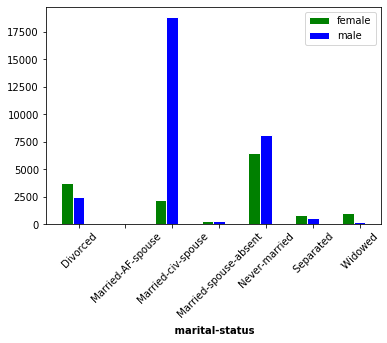

In [38]:
draw_bar_plot(' marital-status')

<class 'pandas.core.series.Series'>
 Amer-Indian-Eskimo      166
 Asian-Pac-Islander      436
 Black                  2084
 Other                   126
 White                 11883
Name:  race, dtype: int64
(5,)
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Y'],
      dtype='object')
<class 'pandas.core.series.Series'>
 Amer-Indian-Eskimo      269
 Asian-Pac-Islander      867
 Black                  2144
 Other                   227
 White                 27020
Name:  race, dtype: int64
(5,)


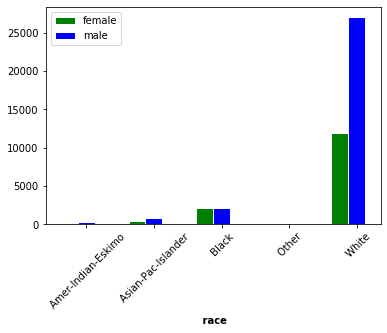

In [40]:
draw_bar_plot(' race')

<class 'pandas.core.series.Series'>
 Adm-clerical         3730
 Armed-Forces            0
 Craft-repair          315
 Exec-managerial      1724
 Farming-fishing        95
 Handlers-cleaners     253
 Machine-op-inspct     793
 Other-service        2642
 Priv-house-serv       218
 Prof-specialty       2203
 Protective-serv       122
 Sales                1921
 Tech-support          554
 Transport-moving      125
Name:  occupation, dtype: int64
(14,)
<class 'pandas.core.series.Series'>
 Adm-clerical         1810
 Armed-Forces           14
 Craft-repair         5705
 Exec-managerial      4260
 Farming-fishing      1385
 Handlers-cleaners    1793
 Machine-op-inspct    2177
 Other-service        2166
 Priv-house-serv        14
 Prof-specialty       3805
 Protective-serv       854
 Sales                3487
 Tech-support          866
 Transport-moving     2191
Name:  occupation, dtype: int64
(14,)


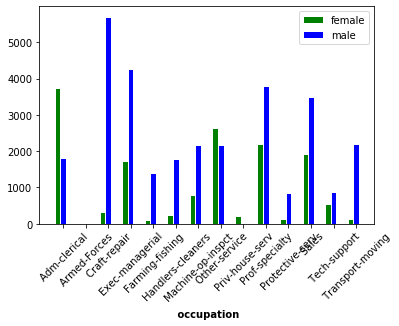

In [61]:
column = ' occupation'
y_female = female[column].value_counts()
y_female[' Armed-Forces'] = 0 
y_female = y_female.sort_index(ascending=True)

print(type(y_female))
print(y_female)
print(y_female.shape)

y_male = male[column].value_counts()
y_male = y_male.sort_index(ascending=True)
print(type(y_male))
print(y_male)
print(y_male.shape)

# set width of bar
barWidth = 0.25

# set height of bar
bars1 = y_female
bars2 = y_male


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='female')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='male')

# Add xticks on the middle of the group bars
plt.xlabel(column, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],y_female.index.values.tolist())
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

In [1]:
column = ' native-country'
y_female = female[column].value_counts()
y_female = y_female.sort_index(ascending=True)

print(type(y_female))
print(y_female)
print(y_female.shape)

y_male = male[column].value_counts()
y_male[' Holand-Netherlands'] = 0 
y_male = y_male.sort_index(ascending=True)
print(type(y_male))
print(y_male)
print(y_male.shape)

# set width of bar
barWidth = 0.25

# set height of bar
bars1 = y_female
bars2 = y_male


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='female')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='male')

# Add xticks on the middle of the group bars
plt.xlabel(column, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],y_female.index.values.tolist())
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

NameError: name 'female' is not defined